In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import seaborn as sns

"""
def plot_confusion_matrix(df, title='Confusion Matrix'):
    plt.figure(figsize=(8,6))
    sns.set(font_scale=1.4)
    perc = df.div(df.sum(axis=0), axis=1).round(2)

    ax = sns.heatmap(df, annot=perc, cmap=plt.cm.Blues, cbar=False, fmt='g', annot_kws={"size": 16})
    ax.set_xlabel('Predicted label', fontsize=16)
    ax.set_ylabel('True label', fontsize=16)
    ax.xaxis.set_ticklabels(ax.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
    ax.yaxis.set_ticklabels(ax.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
    plt.title(title, fontsize=25)
    plt.show()


"""

def plot_confusion_matrix(df, title='Confusion Matrix', target_names=None,  binary=False, cmap =plt.cm.Blues):
    plt.figure(figsize=(8,6))
    sns.set(font_scale=1.4)
    
    if binary:
        tick_labels = ['Negative', 'Positive']
       
        
    else:
        tick_labels = target_names
      
    col_perc = df.apply(lambda x: x/np.sum(x), axis=0).round(2)
    
    ax = sns.heatmap(col_perc, annot=True, cmap=cmap, cbar=False, fmt='.0%', annot_kws={"size": 16},
                     xticklabels=tick_labels, yticklabels=tick_labels)
    ax.set_xlabel('Predicted label', fontsize=16)
    ax.set_ylabel('True label', fontsize=16)
    ax.xaxis.set_ticklabels(ax.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
    ax.yaxis.set_ticklabels(ax.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
    plt.title(title, fontsize=25)
    plt.show()


def plot_confusion_matrix_from_file(file_path, target_names, title='Confusion Matrix',   cmap=plt.cm.Blues, normalize=False):
        
        with open(file_path) as f:
            lines = f.readlines()
        start = -1
        stop = -1
        matrix = []
        for i, line in enumerate(lines):
            if "Confusion Matrix" in line:
                    start = i
                   
            if "Classification Report" in line:
                    stop = i
                  
        matrix = [line.strip() for line in lines[start+1:stop] if not line == '']
        matrix = list(filter(lambda x: x != '', matrix))
        matrix = [elem.replace('[', '').replace(']', '') if isinstance(elem, str) else elem for elem in matrix]
        matrix = [x.split() for x in matrix]
        data = pd.DataFrame(matrix, columns=target_names, index=target_names)
        
        plot_confusion_matrix(data.astype(int), title, target_names=target_names,  cmap=cmap)
        
        



In [20]:
""""
file_path = 'logs_big/annomi/graph_data_cnn.csv'
target_names = ["other", "question", "reflection", "input"]

plot_confusion_matrix_from_file(file_path, target_names,title='CNN Model',  cmap=plt.cm.Blues)
"""

'"\nfile_path = \'logs_big/annomi/graph_data_cnn.csv\'\ntarget_names = ["other", "question", "reflection", "input"]\n\nplot_confusion_matrix_from_file(file_path, target_names,title=\'CNN Model\',  cmap=plt.cm.Blues)\n'

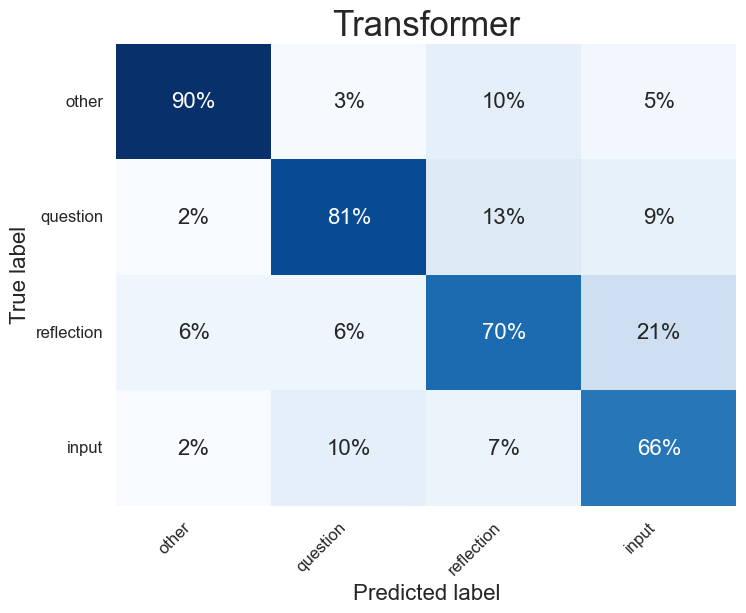

In [21]:
file_path = 'logs_big/annomi/graph_data_transformer.csv'
target_names = ["other", "question", "reflection", "input"]

plot_confusion_matrix_from_file(file_path, target_names, title='Transformer',  cmap=plt.cm.Blues)